In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2 #opencv image processing
import time # Runtime calculation

import tensorflow # Deep Learning Frameworks
import numpy as np  # Mathematical and Array Operations
import pandas as pd# Data Frame Operations
from PIL import Image # Python Imaging Library
import seaborn as sns # Visualization library
import matplotlib.pyplot as plt  # Visualization library
# Deep Learning API functionalities
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation 
from tensorflow.keras.models import Sequential # Sequential model initialization
from sklearn.model_selection import train_test_split  # function to split sample data to train and test

from tensorflow.keras.metrics import categorical_crossentropy  # Loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For data pipeline building
# Neural network layers
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
# To prevent Over-fitting
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
%load_ext tensorboard
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
class_names = os.listdir('/home/kamrul/Desktop/Final project/train')

class_types = len(os.listdir('/home/kamrul/Desktop/Final project/test'))
print('Type of classification: ',class_types)

print('\nTrain Images')
for i in class_names:
    print(i + ':' + str(len(os.listdir('/home/kamrul/Desktop/Final project/train/'+i))))
print('\nTest Images ')
for i in class_names:
    print(i + ':' + str(len(os.listdir('/home/kamrul/Desktop/Final project/train/'+i))))

Type of classification:  7

Train Images
angry:3995
disgusted:436
happy:7215
surprised:3171
sad:4830
neutral:4965
fearful:4097

Test Images 
angry:3995
disgusted:436
happy:7215
surprised:3171
sad:4830
neutral:4965
fearful:4097


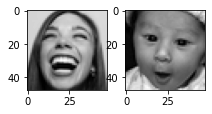

In [3]:
import random
train_data = '/home/kamrul/Desktop/Final project/train'
def rescale_and_plot_images(image_files):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')

def plot_images(path, emotion):
    image_paths = []
    emotion_path = os.path.join(path, emotion)
    image_paths = [os.path.join(emotion_path, img_png) for img_png in random.sample(os.listdir(emotion_path), 2)]
    
    plt.figure(figsize = (5, 5))
    rescale_and_plot_images(image_paths)
    

plot_images(train_data, 'happy')

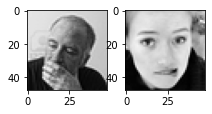

In [4]:
plot_images(train_data, 'fearful')

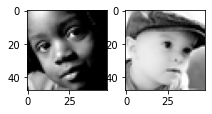

In [5]:
plot_images(train_data, 'neutral')

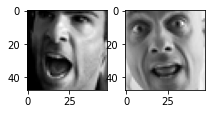

In [6]:
plot_images(train_data, 'angry')

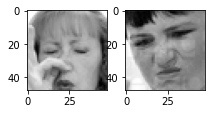

In [7]:
plot_images(train_data, 'disgusted')

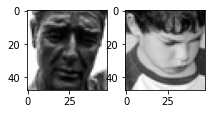

In [8]:
plot_images(train_data, 'sad')

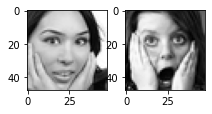

In [9]:
plot_images(train_data, 'surprised')

In [10]:
train = tf.keras.preprocessing.image_dataset_from_directory(
 '/home/kamrul/Desktop/Final project/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(48,48),
  batch_size=64)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [11]:
valid = tf.keras.preprocessing.image_dataset_from_directory(
  '/home/kamrul/Desktop/Final project/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(48, 48),
  batch_size=64)

Found 7178 files belonging to 7 classes.
Using 1435 files for validation.


In [12]:
print(len(train))
print(len(valid))

359
23


In [13]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 48, 48, 3)
(64,)


In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.07450981 1.0


In [16]:
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(48, 48, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

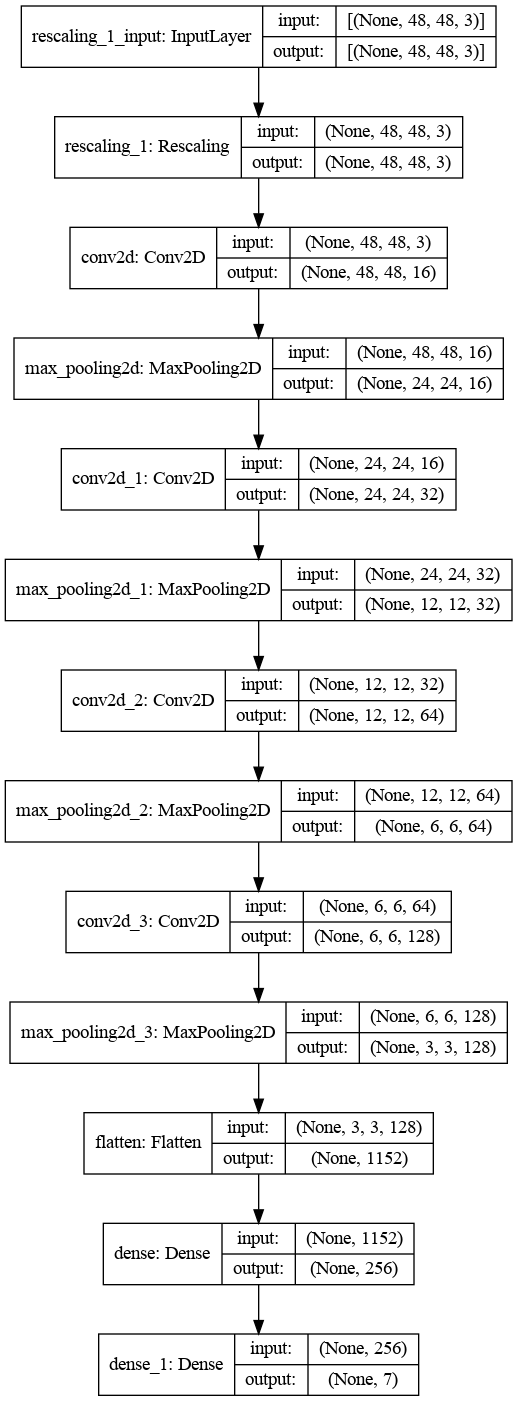

In [19]:
tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True)

In [20]:
import datetime

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=3)
epochs=15
history = model.fit(
  train,
  validation_data=valid,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
 78/359 [=====>........................] - ETA: 1:20 - loss: 1.8501 - accuracy: 0.2344

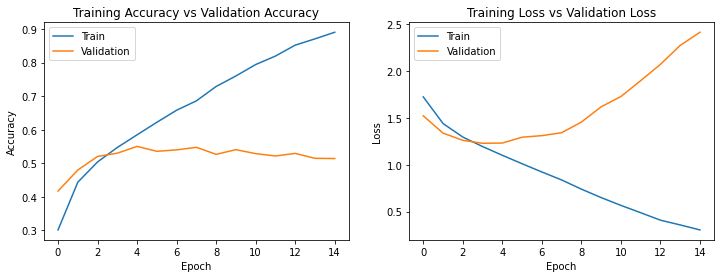

In [23]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [24]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc   = model.evaluate(valid)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 18ms/step - loss: 2.4125 - accuracy: 0.5143
final train accuracy = 80.53 , validation accuracy = 51.43


In [25]:
%tensorboard --logdir logs/fit

In [26]:
import visualkeras

In [27]:
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png',spacing=60).show() 

Regulaizers

In [28]:
from keras.regularizers import l2
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(48,48, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)         

In [31]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=3)
epochs=15
history = model.fit(
  train,
  validation_data=valid,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
359/359 [==============================] - 16s 41ms/step - loss: 2.7034 - accuracy: 0.2473 - val_loss: 1.6552 - val_accuracy: 0.3596
Epoch 2/15
359/359 [==============================] - 16s 44ms/step - loss: 1.6409 - accuracy: 0.3708 - val_loss: 1.4575 - val_accuracy: 0.4544
Epoch 3/15
359/359 [==============================] - 18s 50ms/step - loss: 1.4858 - accuracy: 0.4451 - val_loss: 1.3655 - val_accuracy: 0.5031
Epoch 4/15
359/359 [==============================] - 15s 43ms/step - loss: 1.3912 - accuracy: 0.4853 - val_loss: 1.3126 - val_accuracy: 0.5150
Epoch 5/15
359/359 [==============================] - 16s 43ms/step - loss: 1.3217 - accuracy: 0.5173 - val_loss: 1.2911 - val_accuracy: 0.5275
Epoch 6/15
359/359 [==============================] - 16s 44ms/step - loss: 1.2612 - accuracy: 0.5424 - val_loss: 1.2793 - val_accuracy: 0.5345
Epoch 7/15
359/359 [==============================] - 15s 41ms/step - loss: 1.2241 - accuracy: 0.5558 - val_loss: 1.2901 - val_accuracy:

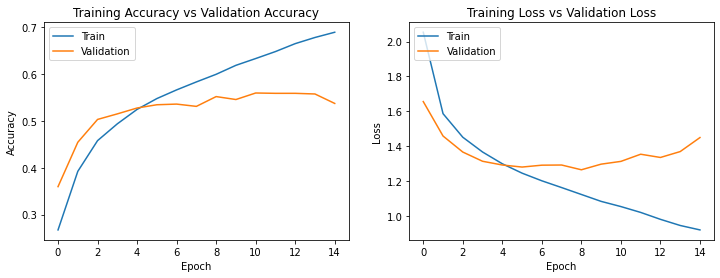

In [32]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [33]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc   = model.evaluate(valid)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 18ms/step - loss: 1.4487 - accuracy: 0.5373
final train accuracy = 67.84 , validation accuracy = 53.73


In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18975), started 0:04:12 ago. (Use '!kill 18975' to kill it.)

In [35]:
from keract import get_activations, display_activations

rescaling_2_input (1, 48, 48, 3) 


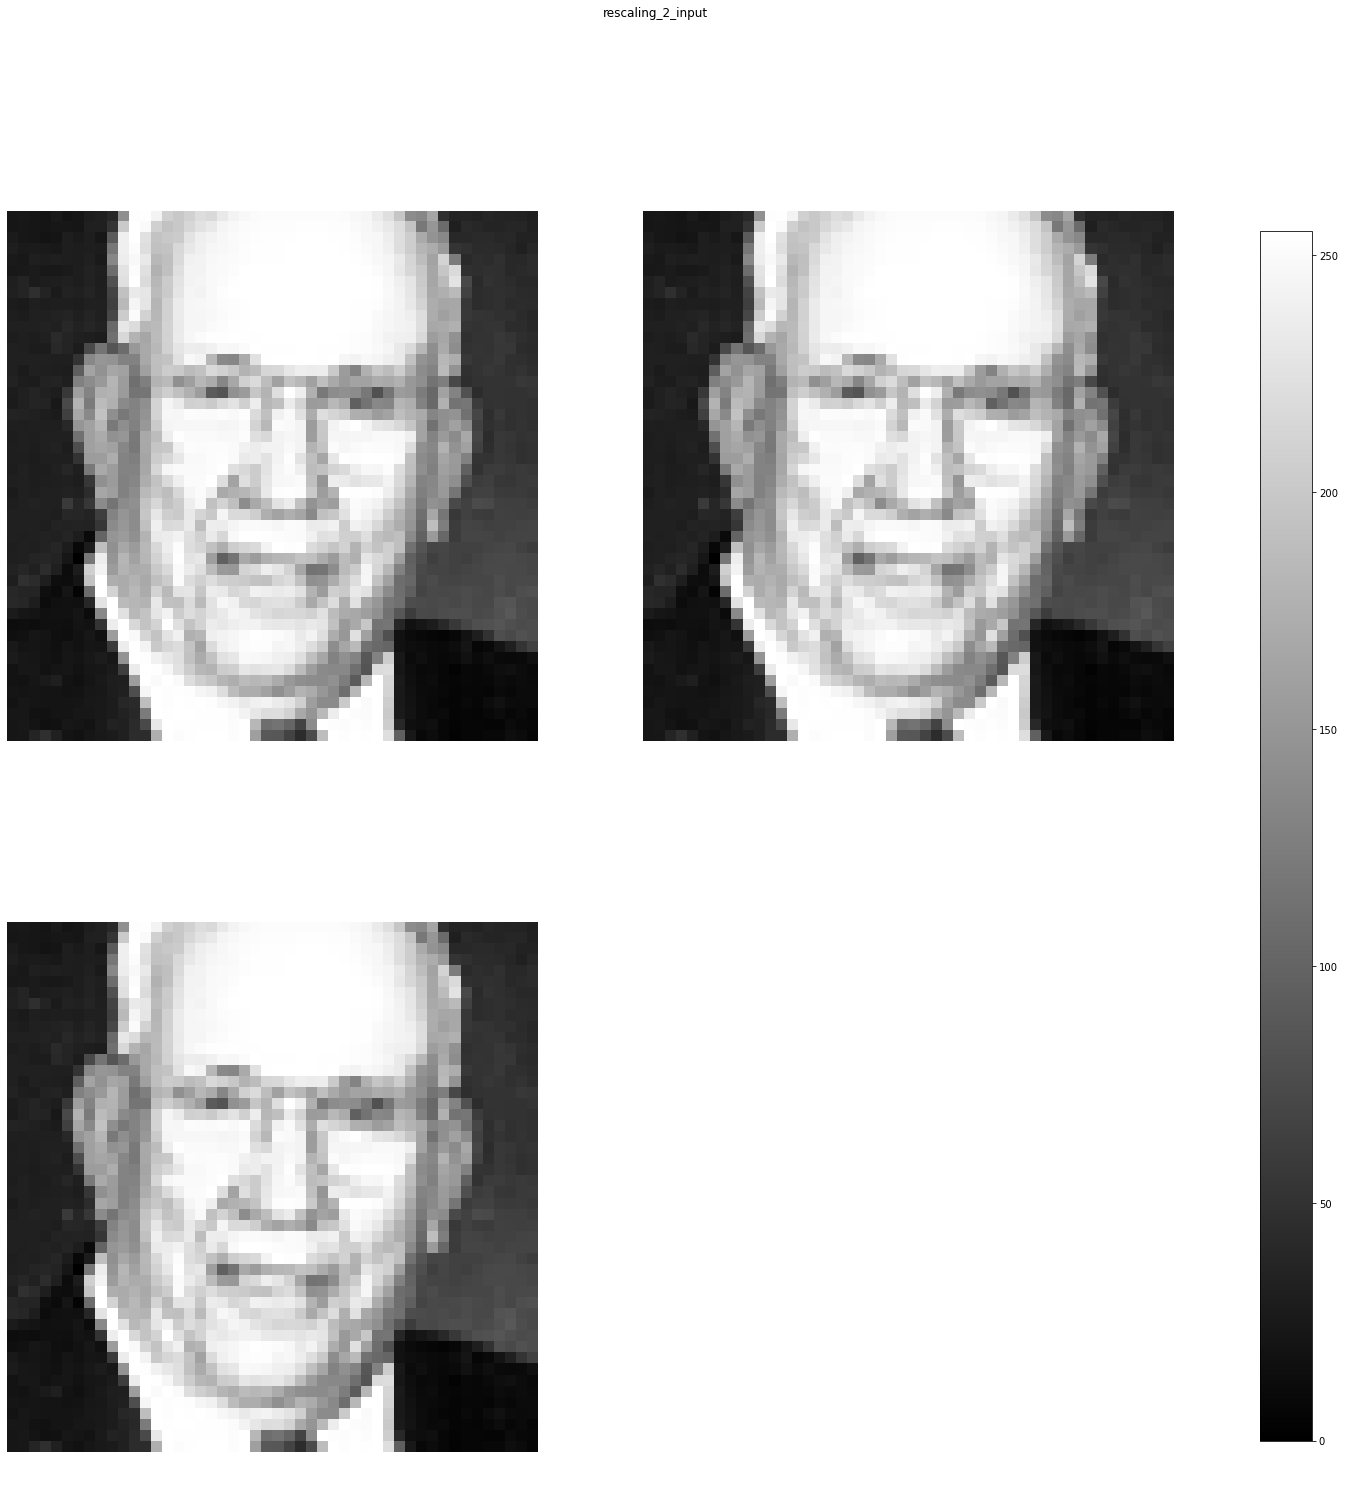

rescaling_2 (1, 48, 48, 3) 


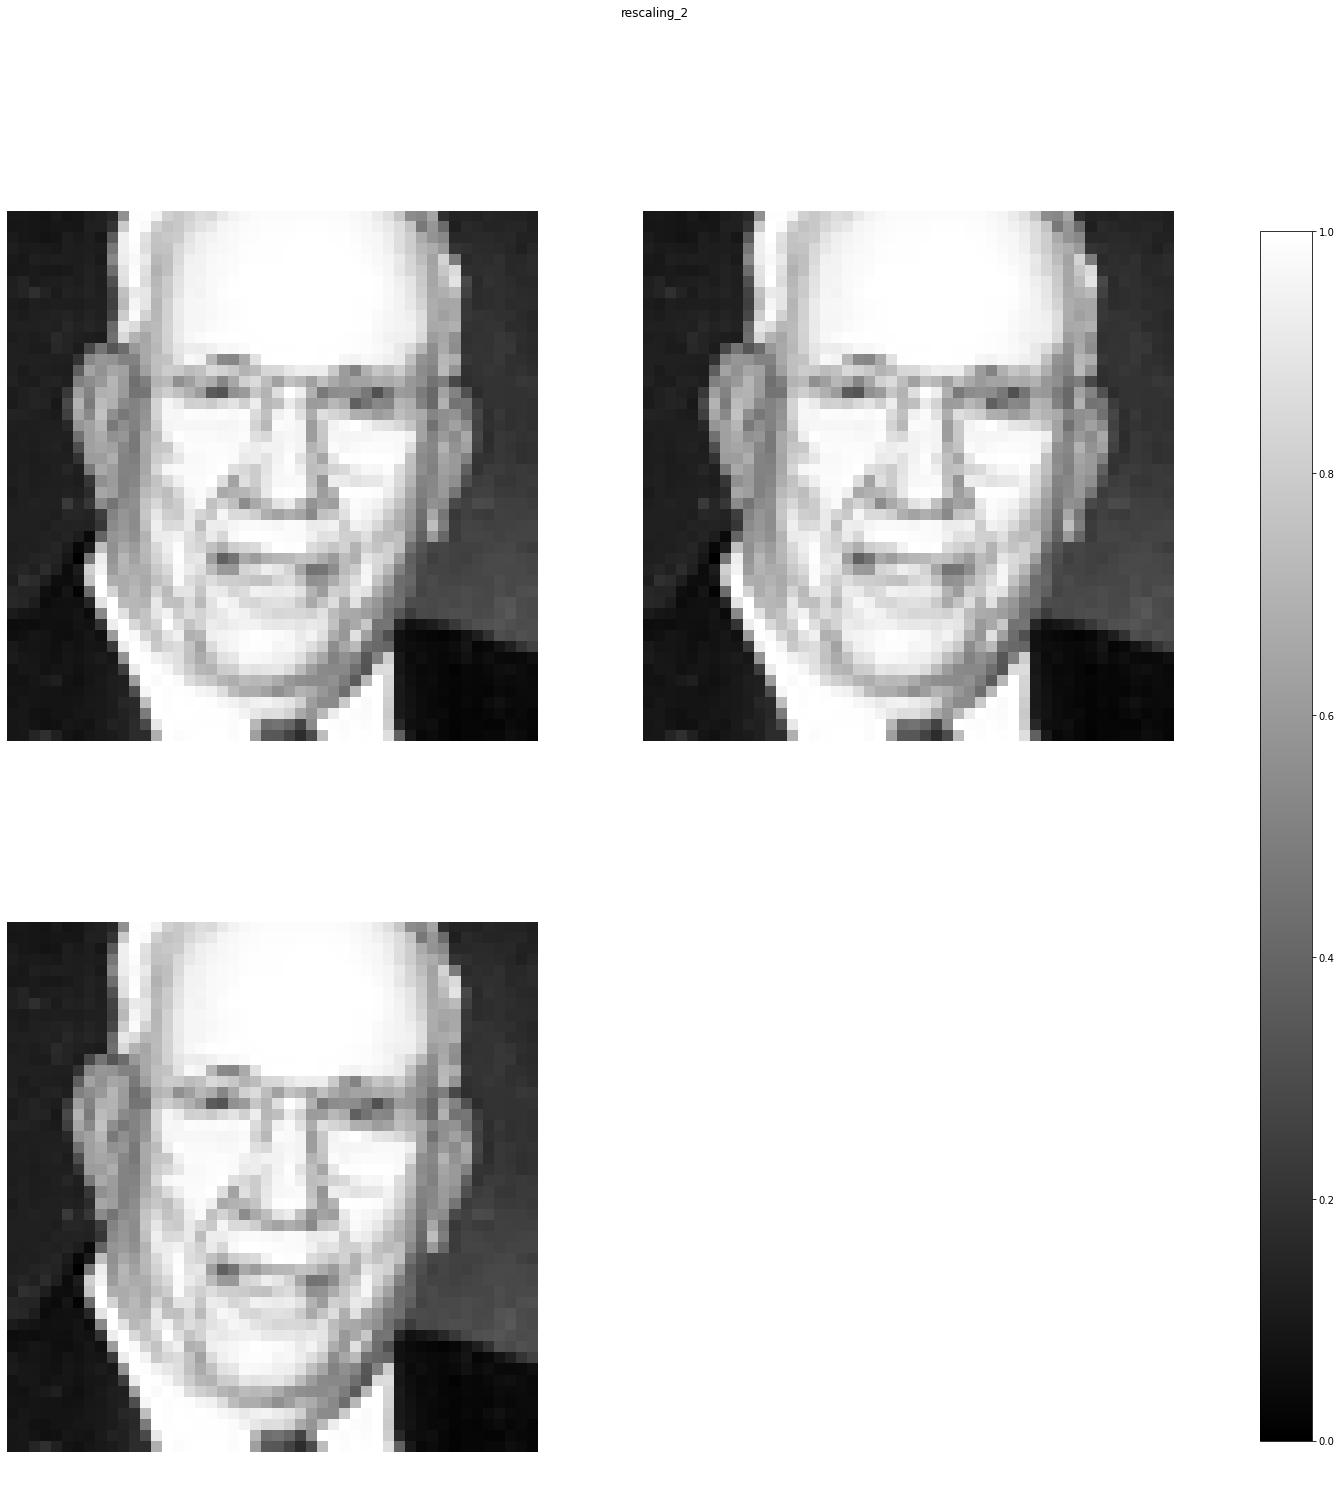

conv2d_4 (1, 48, 48, 16) 


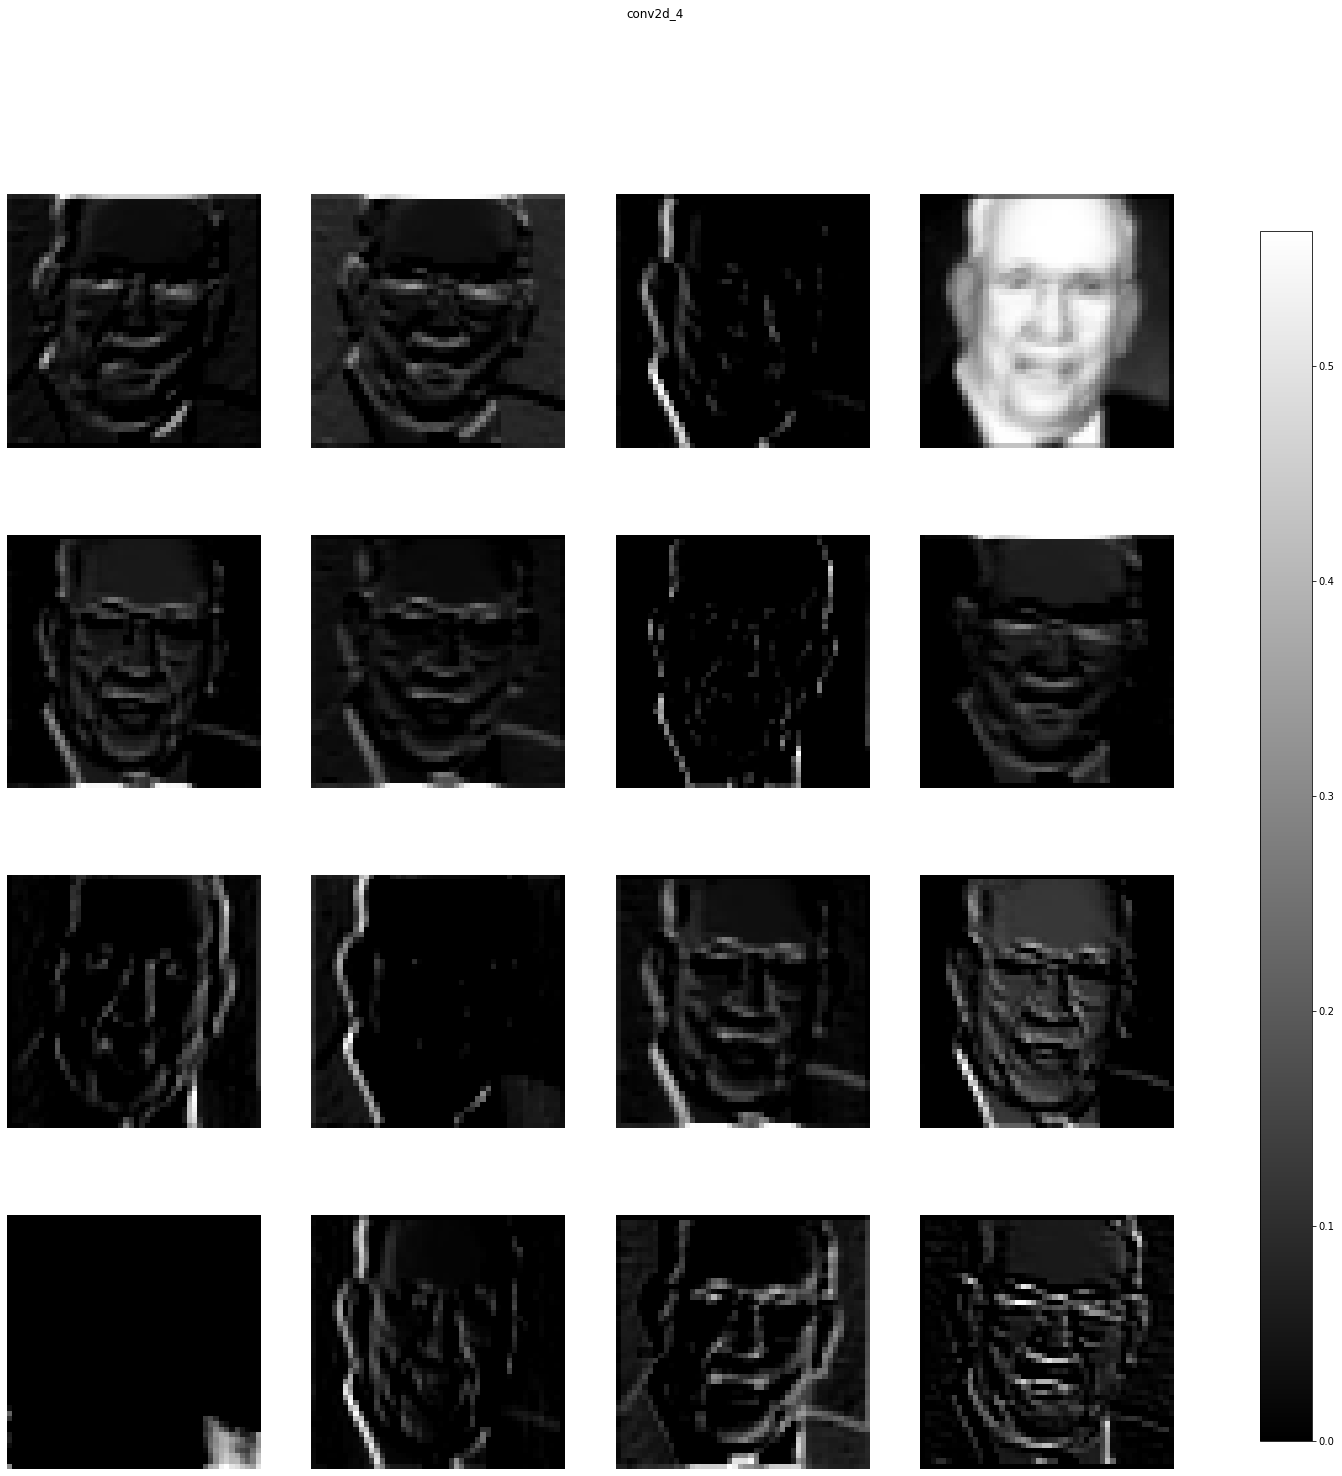

max_pooling2d_4 (1, 24, 24, 16) 


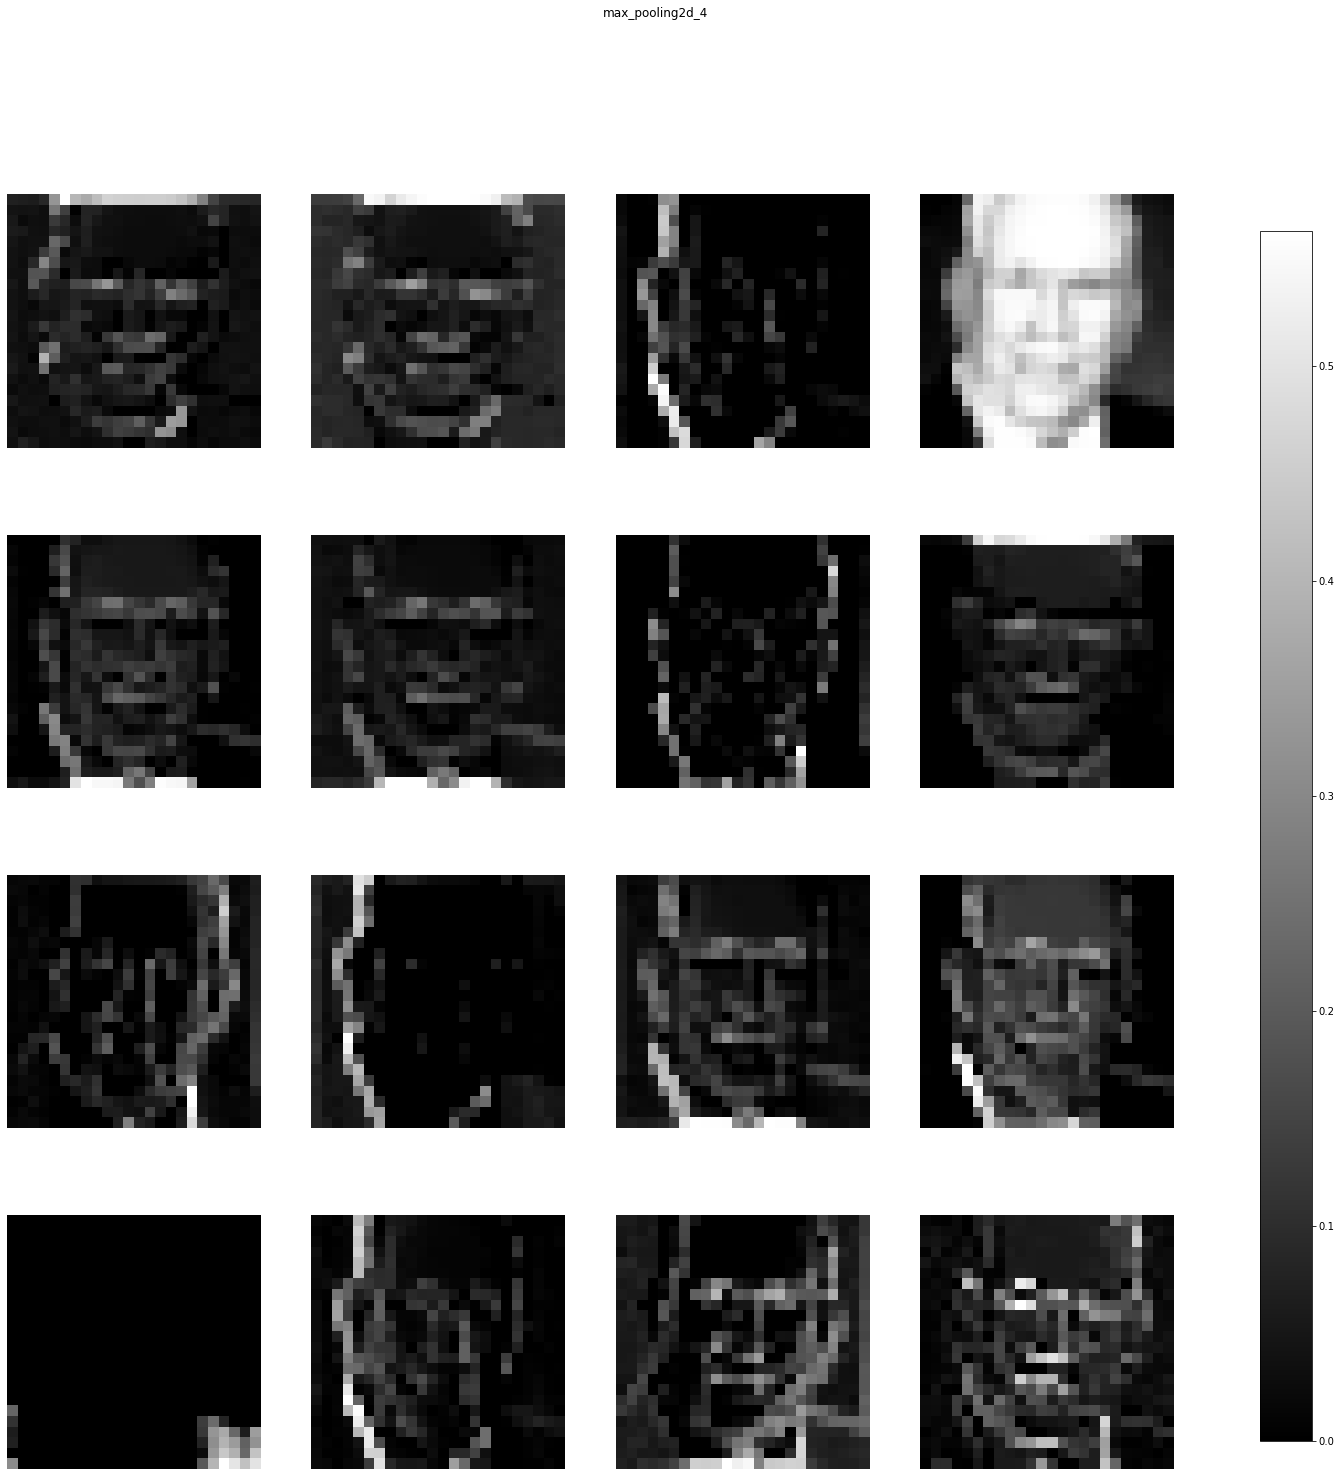

conv2d_5 (1, 24, 24, 32) 


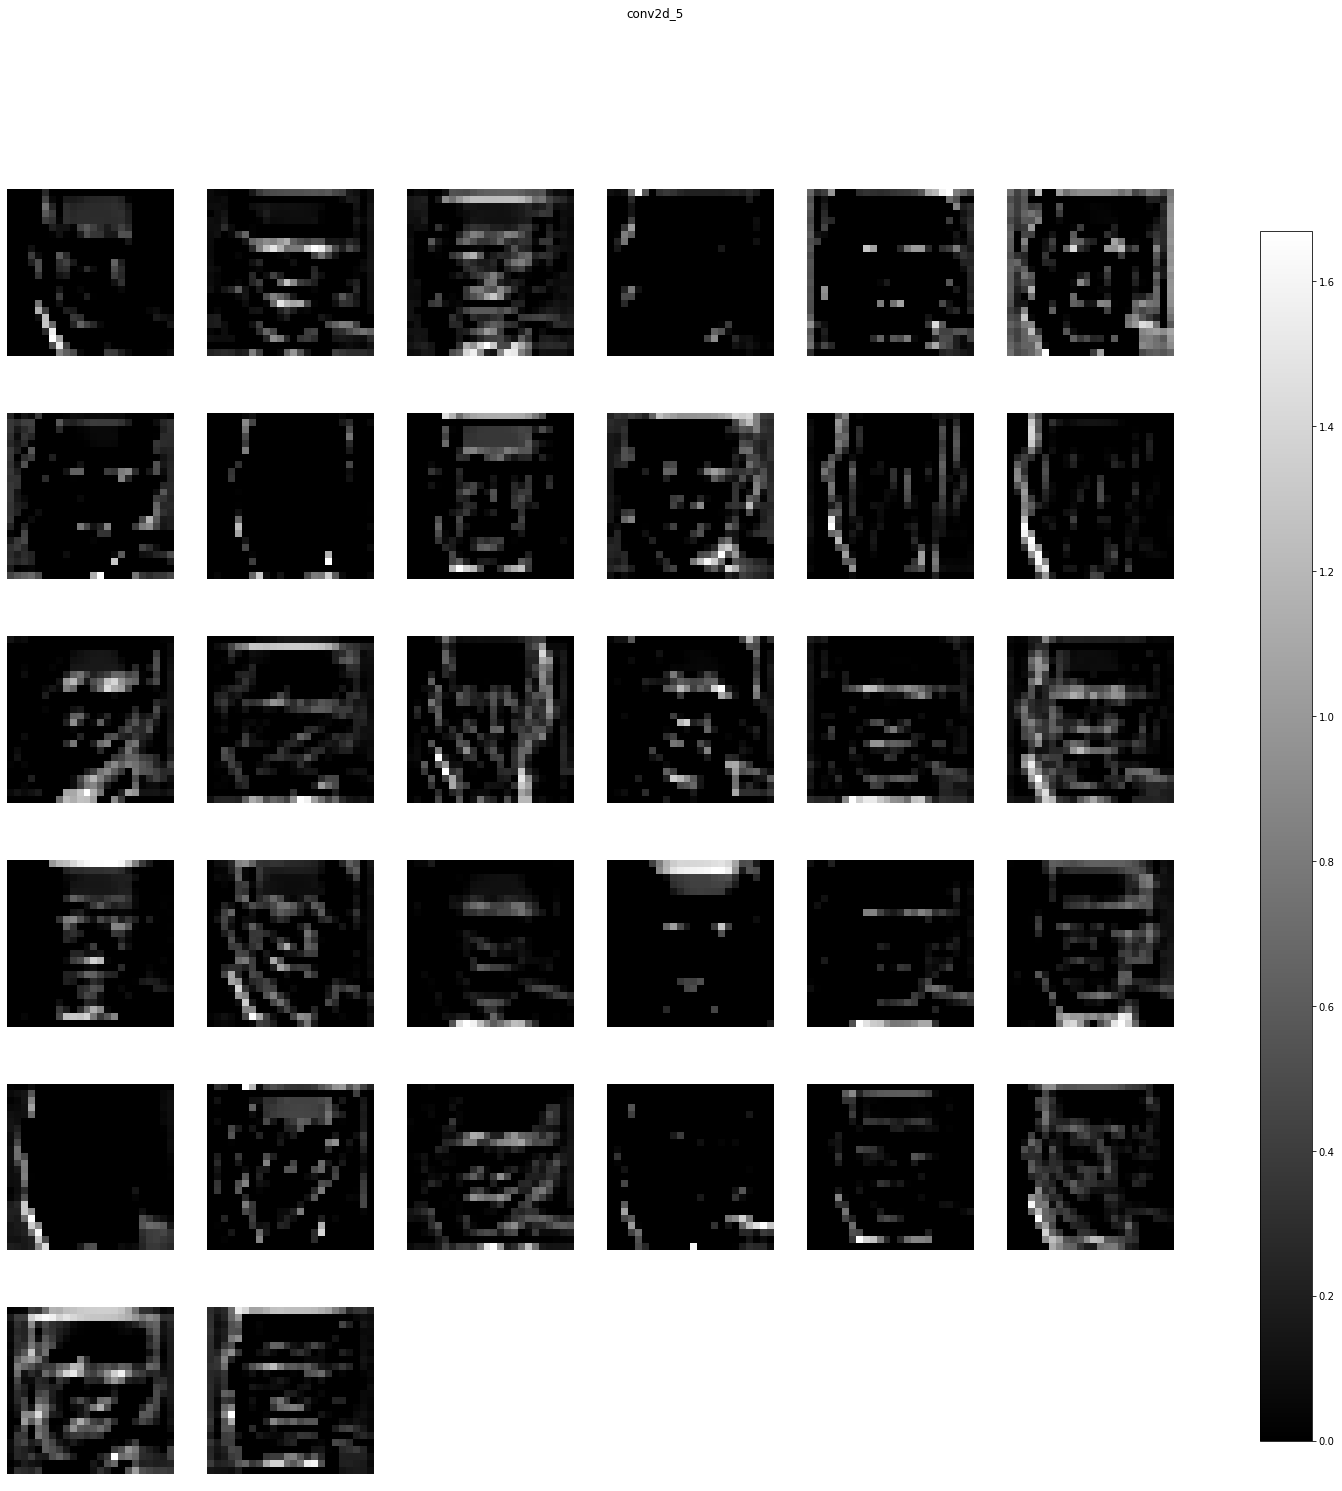

max_pooling2d_5 (1, 12, 12, 32) 


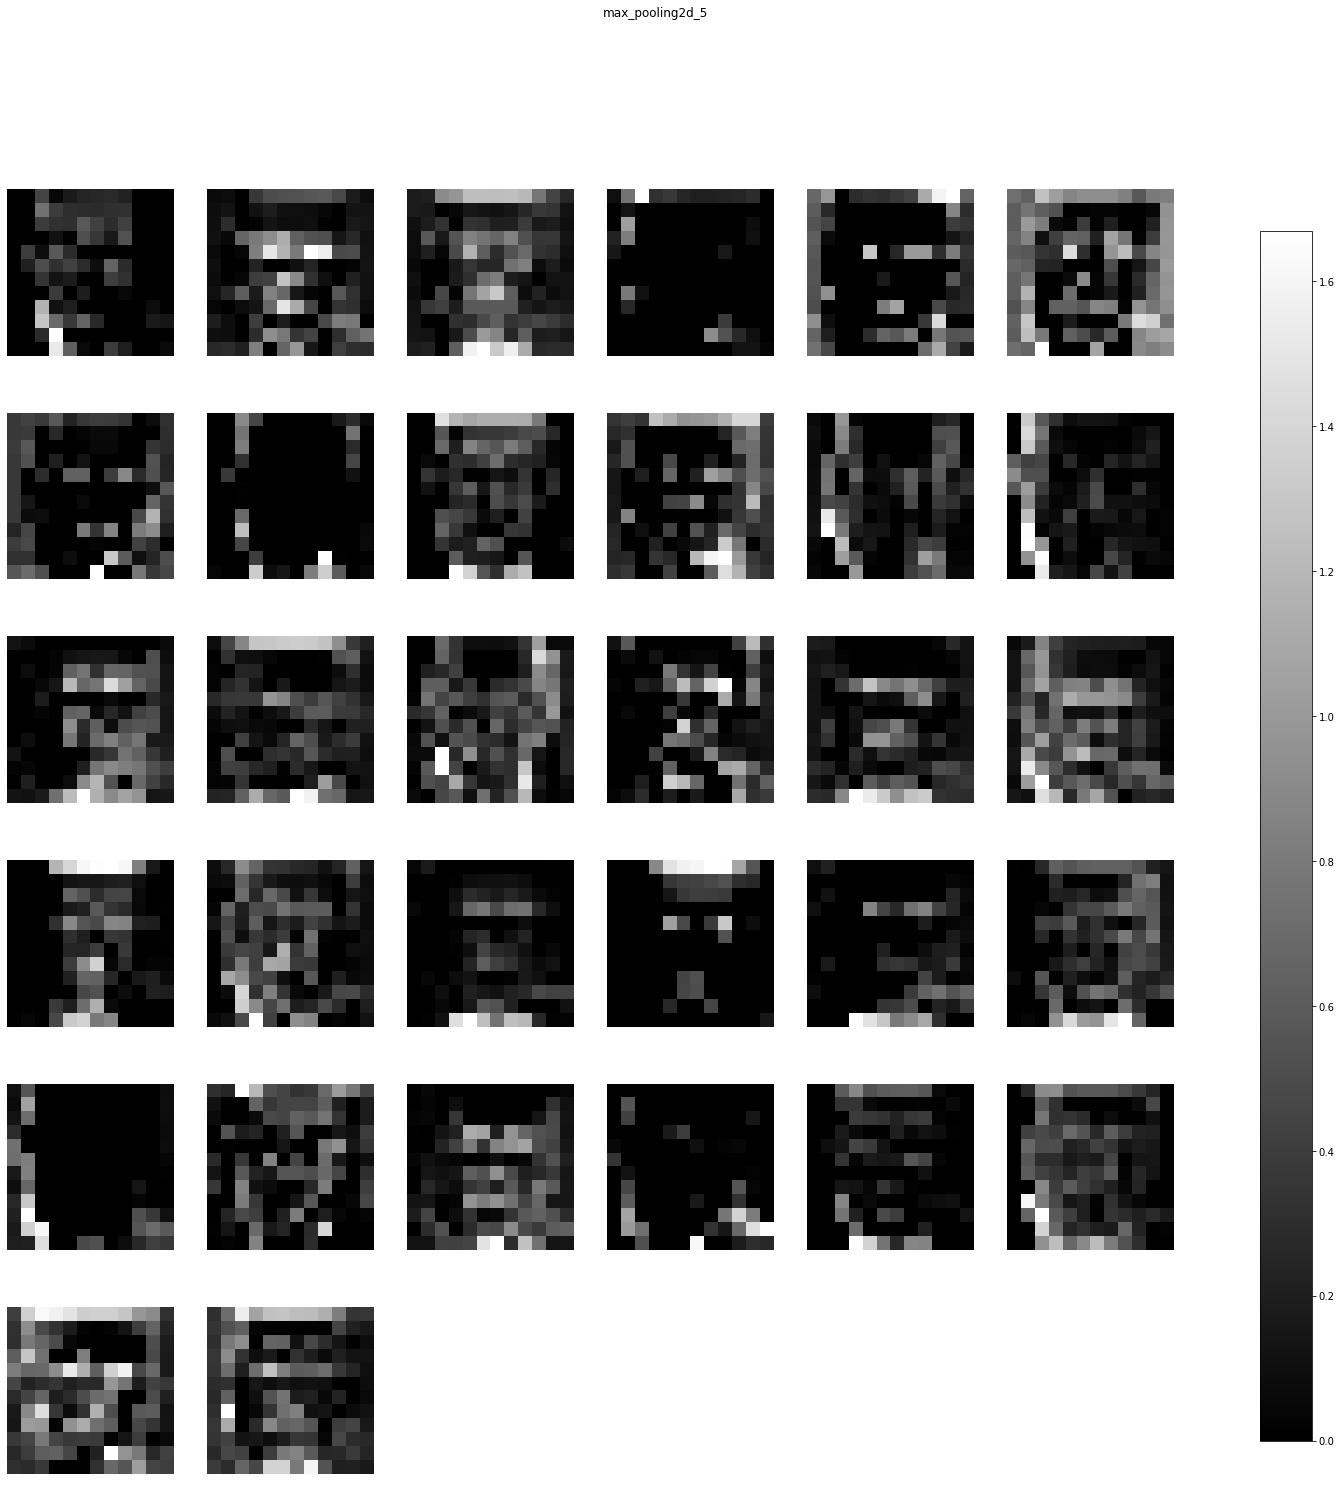

conv2d_6 (1, 12, 12, 64) 


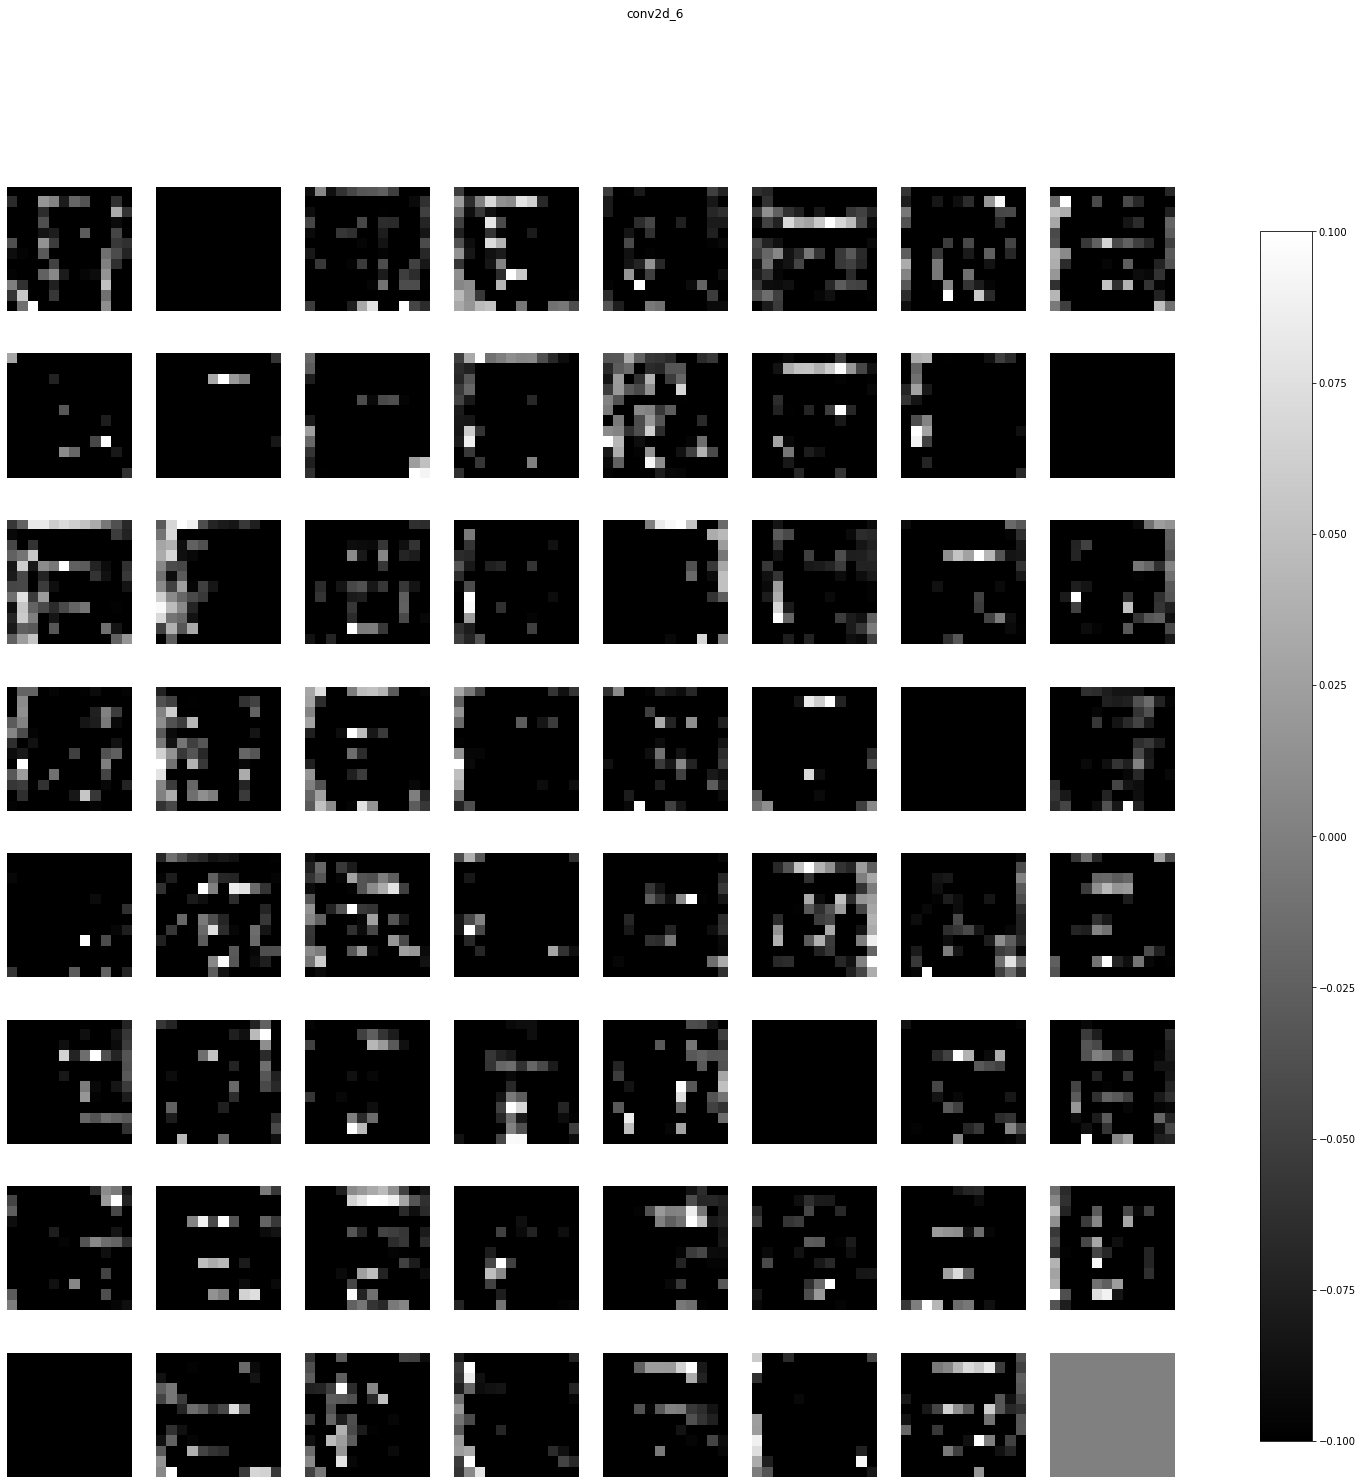

max_pooling2d_6 (1, 6, 6, 64) 


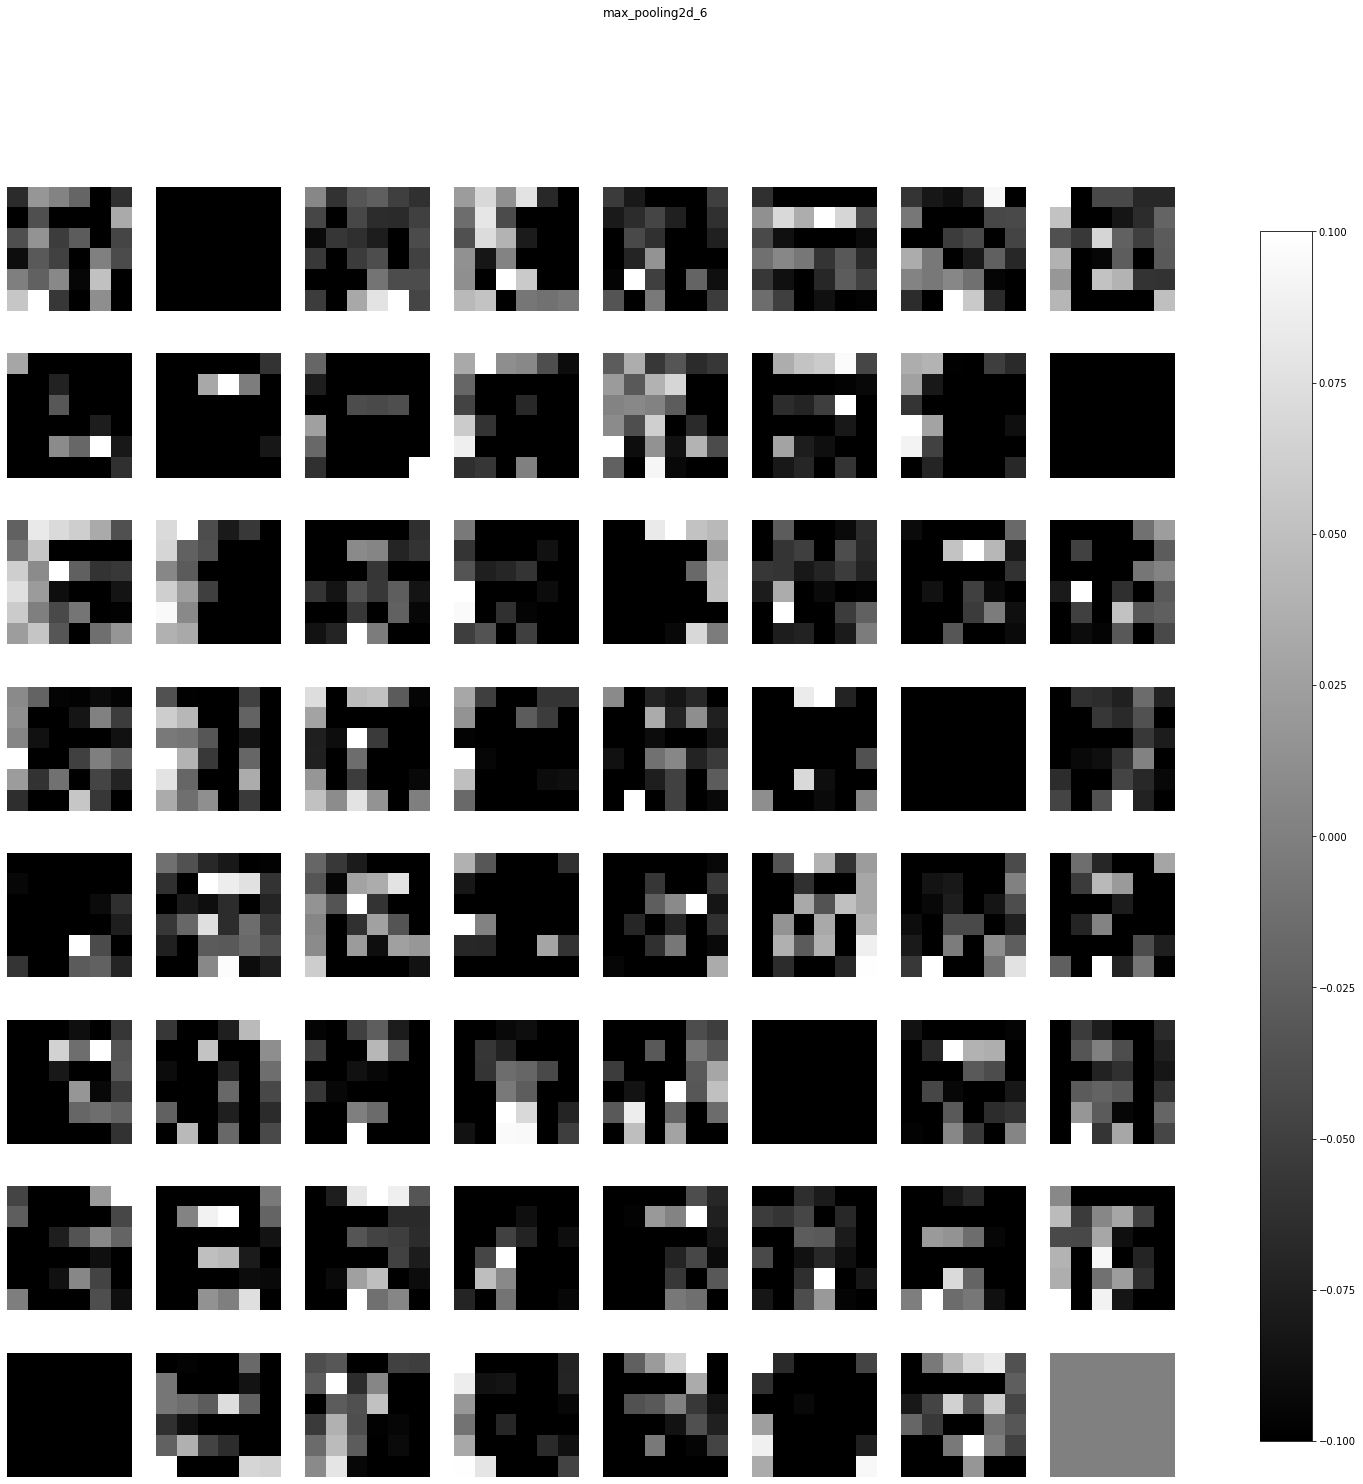

conv2d_7 (1, 6, 6, 128) 


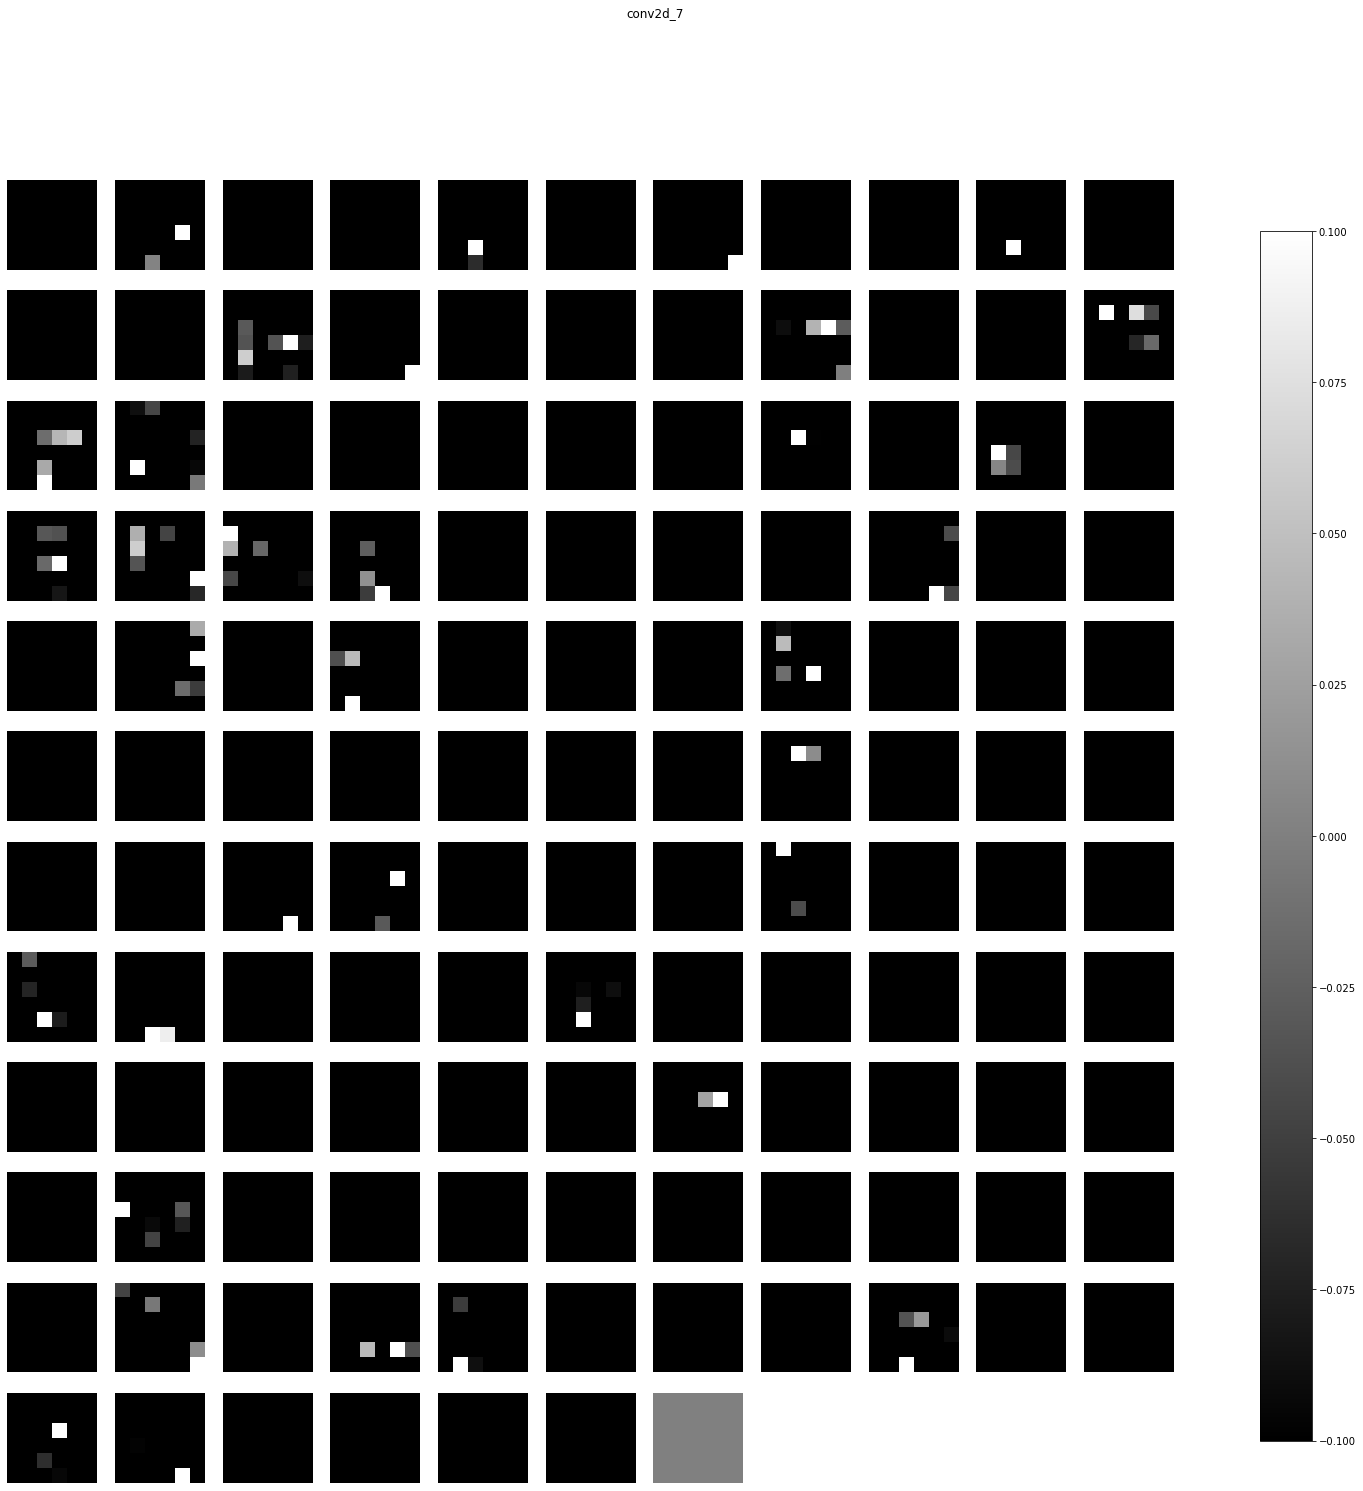

max_pooling2d_7 (1, 3, 3, 128) 


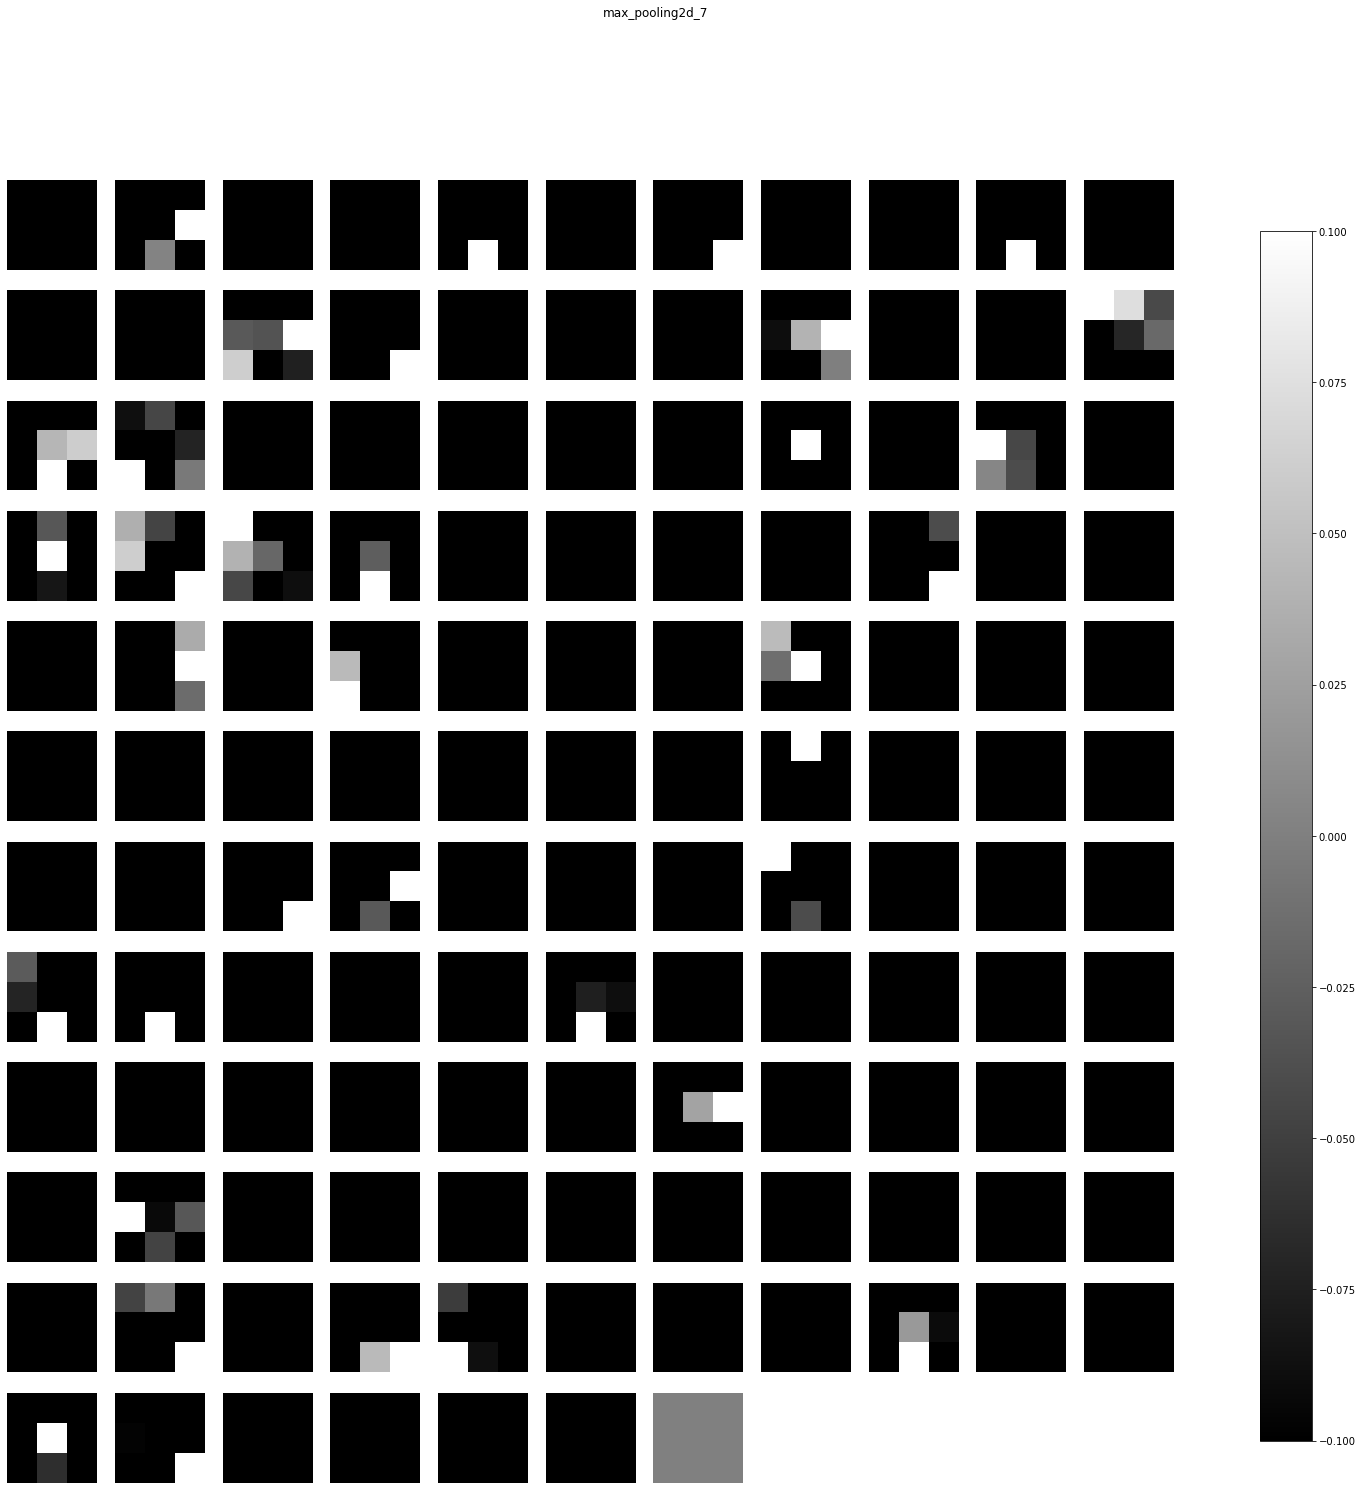

flatten_1 (1, 1152) 


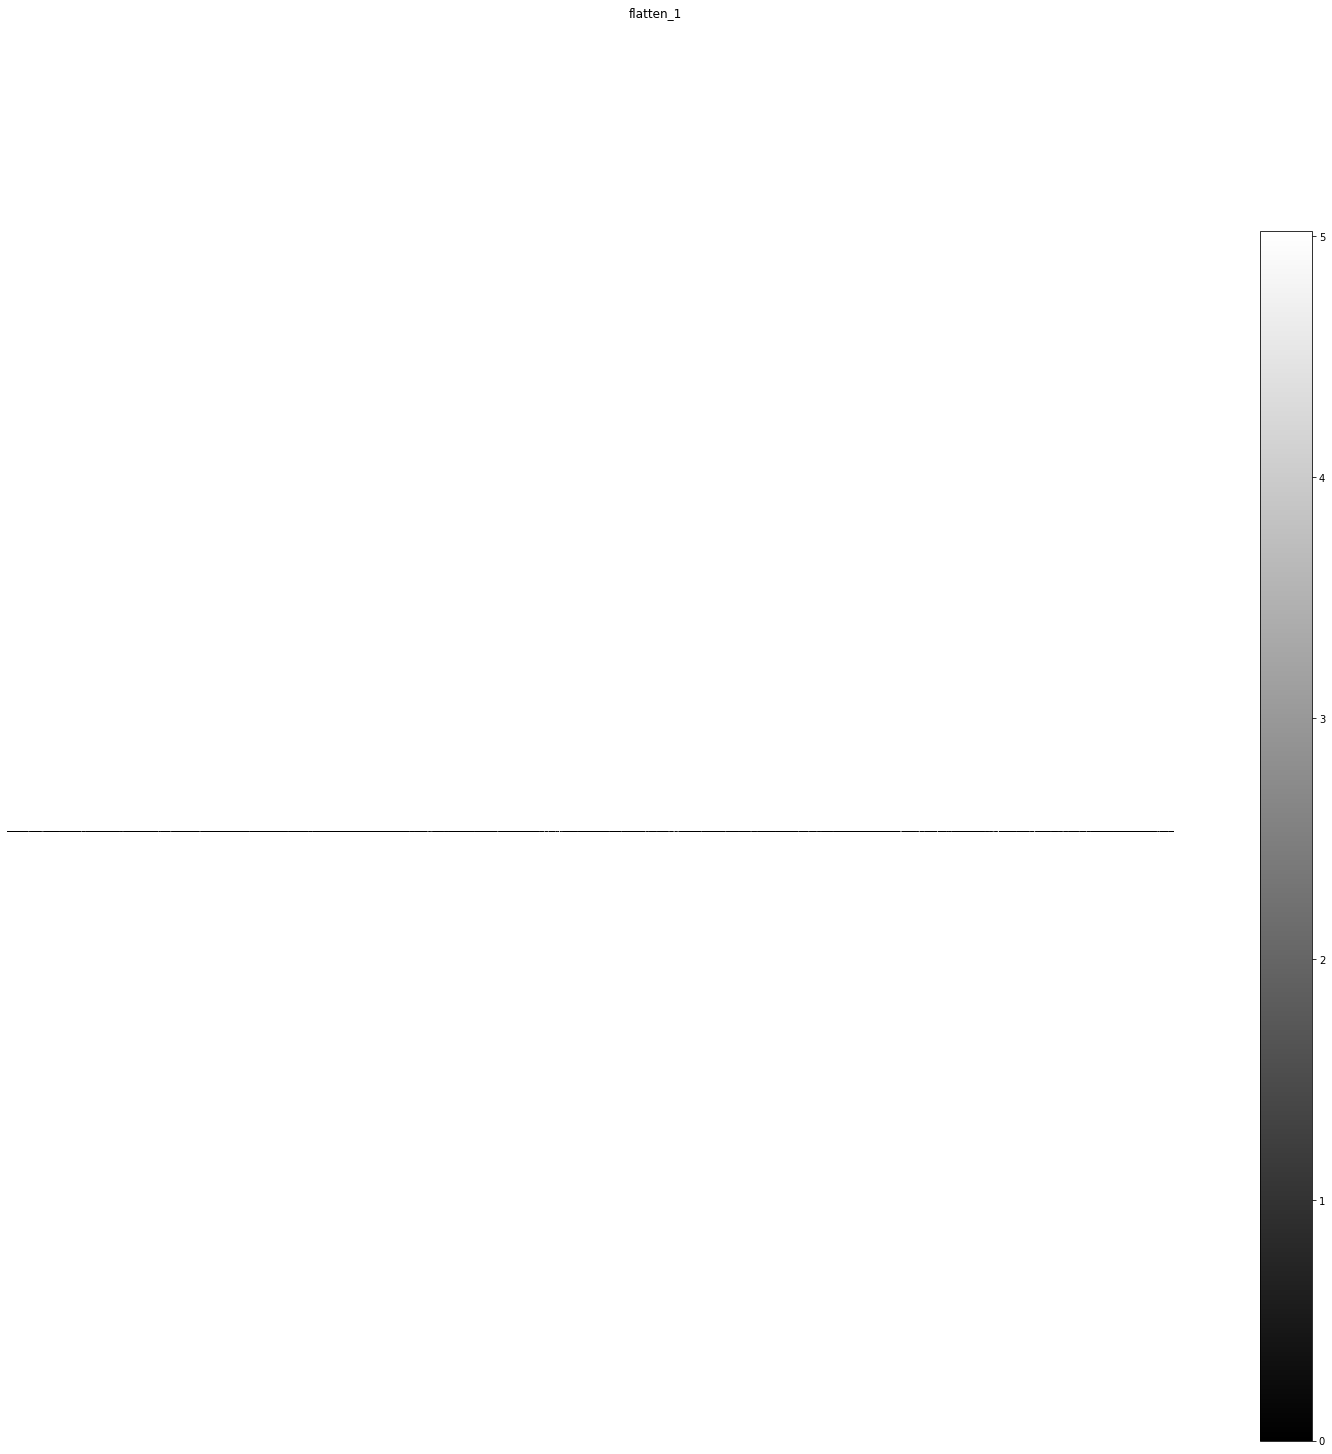

dense_2 (1, 256) 


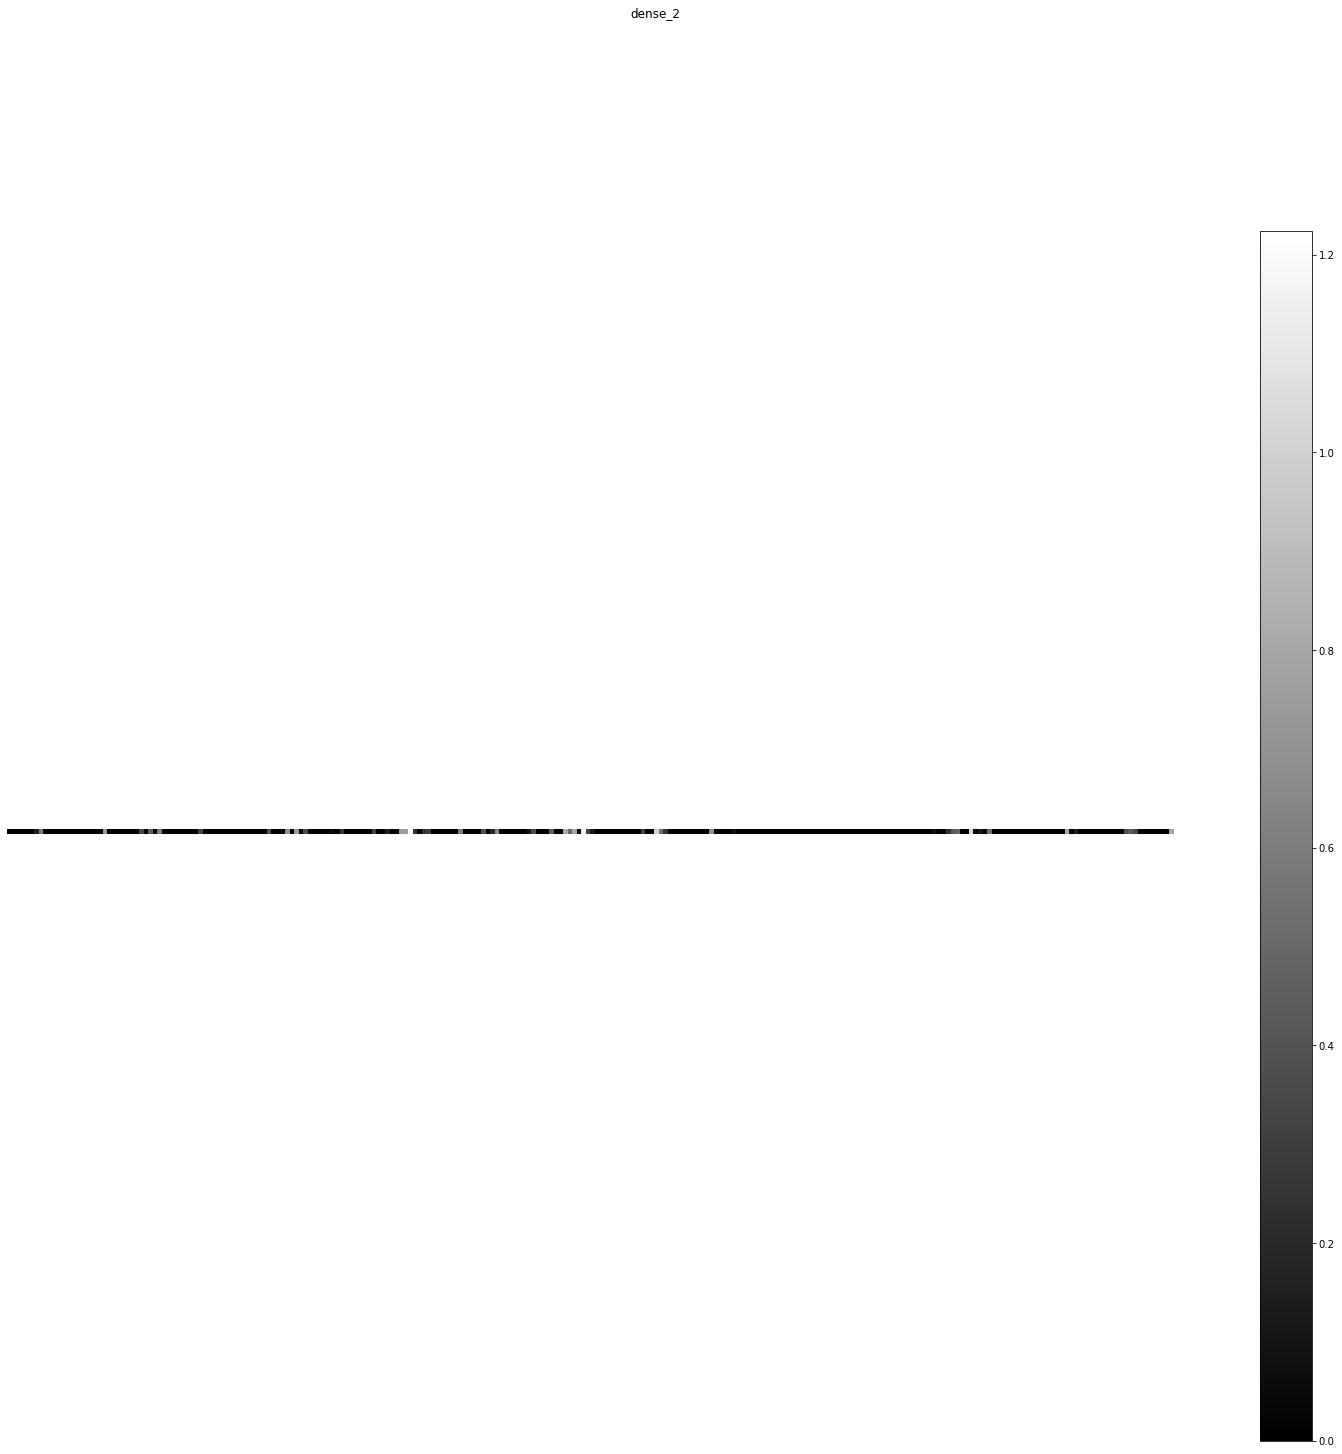

dense_3 (1, 7) 


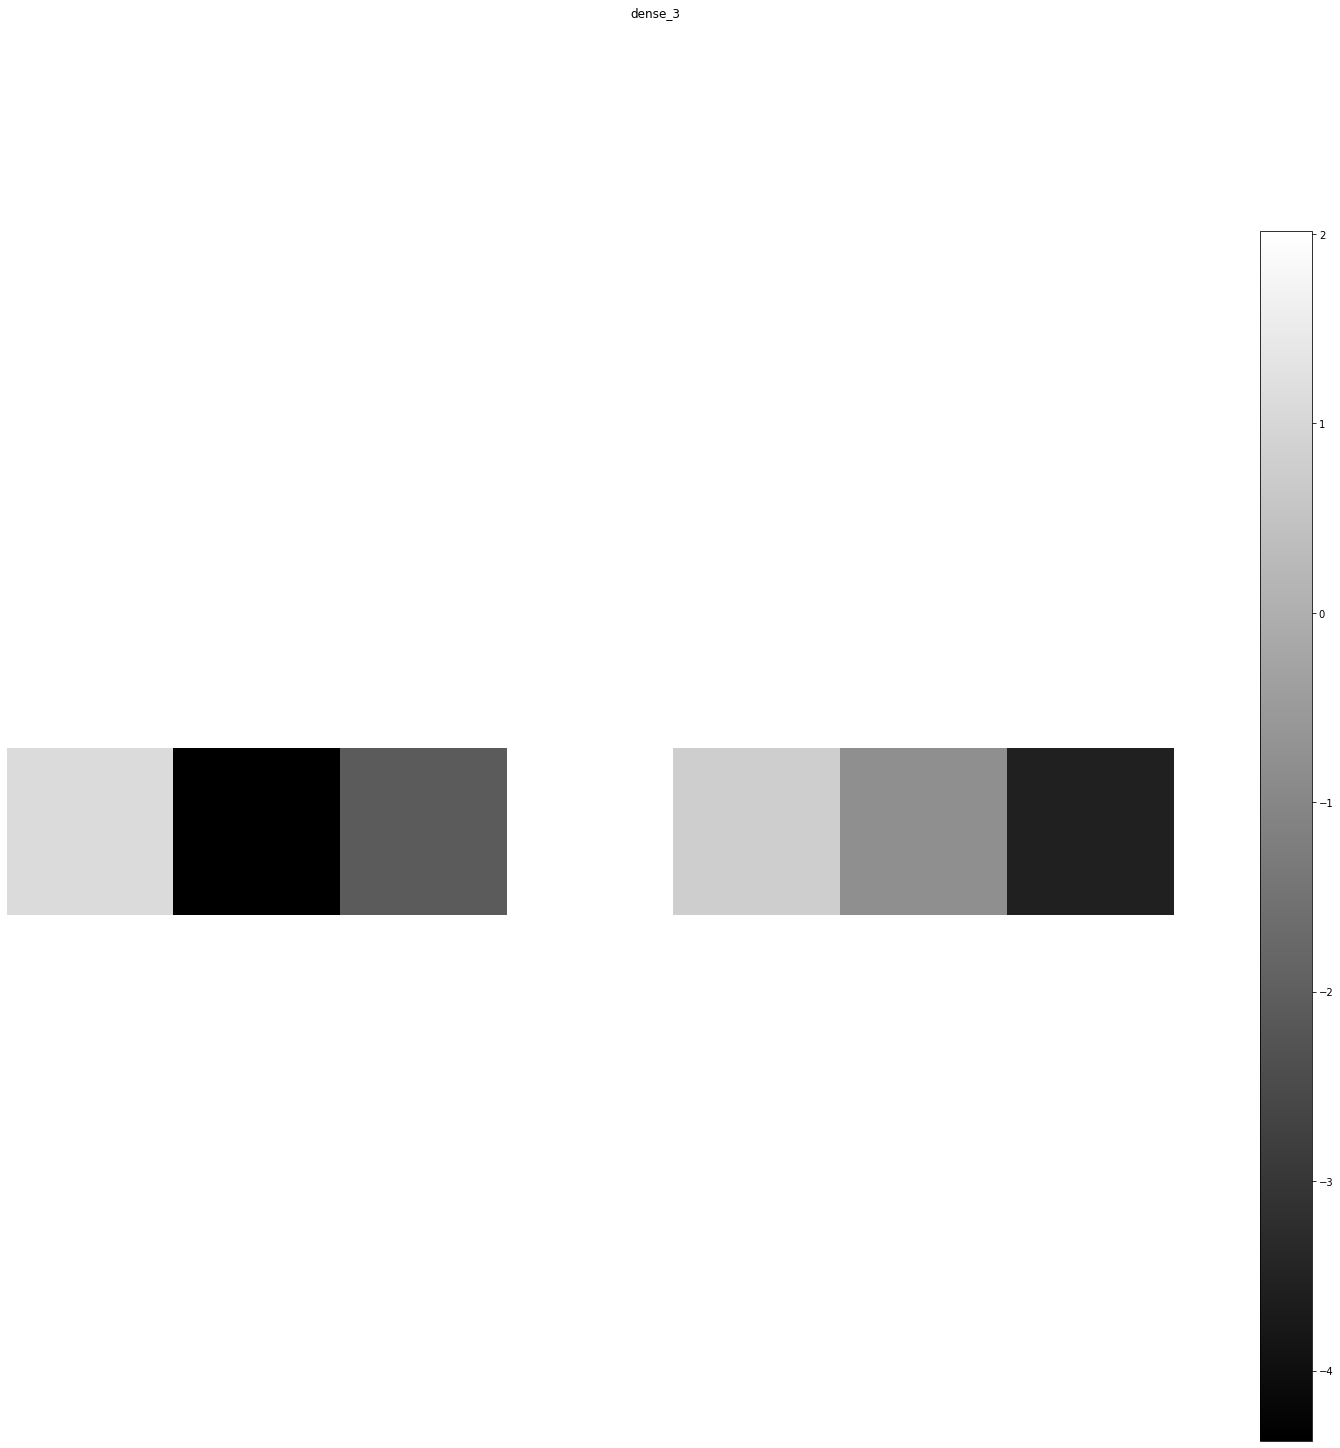

In [36]:
for image_batch, labels_batch in valid:
    keract_inputs=image_batch[:1]
    keract_targets=labels_batch[:1]
    break
activations= get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)


In [37]:
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(48,48, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
  layers.Dense(num_classes)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)      

In [40]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=3)
epochs=15
history = model.fit(
  train,
  validation_data=valid,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
359/359 [==============================] - 47s 123ms/step - loss: 2.4362 - accuracy: 0.2557 - val_loss: 1.6022 - val_accuracy: 0.3965
Epoch 2/15
359/359 [==============================] - 17s 47ms/step - loss: 1.6159 - accuracy: 0.3965 - val_loss: 1.4925 - val_accuracy: 0.4439
Epoch 3/15
359/359 [==============================] - 18s 50ms/step - loss: 1.5145 - accuracy: 0.4425 - val_loss: 1.4261 - val_accuracy: 0.4990
Epoch 4/15
359/359 [==============================] - 16s 45ms/step - loss: 1.4353 - accuracy: 0.4761 - val_loss: 1.3740 - val_accuracy: 0.5031
Epoch 5/15
359/359 [==============================] - 17s 47ms/step - loss: 1.3838 - accuracy: 0.5010 - val_loss: 1.3305 - val_accuracy: 0.5261
Epoch 6/15
359/359 [==============================] - 18s 49ms/step - loss: 1.3353 - accuracy: 0.5221 - val_loss: 1.3407 - val_accuracy: 0.5185
Epoch 7/15
359/359 [==============================] - 18s 49ms/step - loss: 1.2974 - accuracy: 0.5376 - val_loss: 1.2994 - val_accuracy

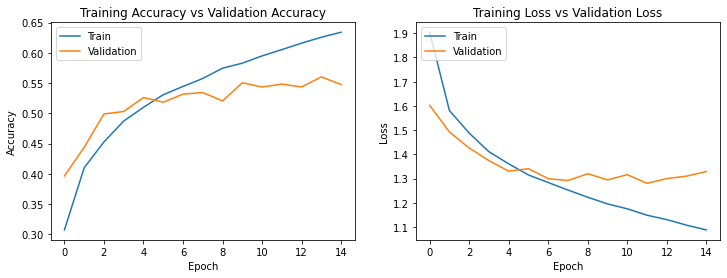

In [41]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [42]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc   = model.evaluate(valid)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 18ms/step - loss: 1.3290 - accuracy: 0.5477
final train accuracy = 66.25 , validation accuracy = 54.77


In [43]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18975), started 0:10:29 ago. (Use '!kill 18975' to kill it.)

Cutmix

In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from matplotlib import pyplot

beta = 0.5
cutmix_prob = 1.0
num_classes = 100
batch_size = 6
r = 0.7 # fixed for cutmix display

def train_augment(image,label):
  image = tf.image.resize_with_crop_or_pad(image, 36, 36) 
  image = tf.image.random_crop(image, size=[20,32, 32, 3]) 
  image = tf.image.random_flip_left_right(image)
  image = tf.cast(image, dtype=tf.float32)
  label = tf.cast(label, dtype=tf.float32)
  return image,label

def rand_bbox(size, lam):

    W = size[1] 
    H = size[2]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)
    
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [45]:

train_dataset = train .map(train_augment)
train_dataset = train .batch(batch_size)
train_dataset = train .shuffle(512)


In [46]:
# cutmix
for image, target in train_dataset:       
  if beta > 0 and r < cutmix_prob:
      lam = np.random.beta(beta, beta)
      rand_index = tf.random.shuffle(tf.range(len(target)))
      target_a = target
      target_b = tf.gather(target, rand_index)
      bbx1, bby1, bbx2, bby2 = rand_bbox(image.shape, lam)       
      image_a = image
      image_b = tf.gather(image, rand_index)
      mask = np.ones_like(image)
      mask[:, bbx1:bbx2, bby1:bby2, :] = 0          
      image_cutmix = tf.math.multiply(image_a,mask) + tf.math.multiply(image_b, (abs(1.-mask)))  
  break

<ipython-input-44-885a716435d8>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cut_w = np.int(W * cut_rat)
<ipython-input-44-885a716435d8>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

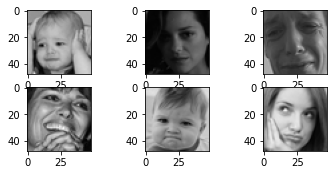

In [47]:

# Original images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image[i]/255.)
pyplot.show()

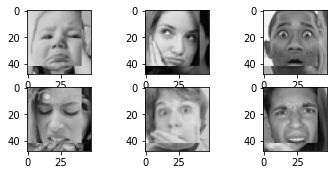

In [48]:
# Cutmix images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image_cutmix[i]/255.)
pyplot.show()

Cutmix with regulaizers

In [49]:
from keras.regularizers import l2, l1
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128,activation='softmax', name="Output_Layer", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.002)),
  layers.Dense(num_classes)
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
history = model.fit(
  train,
  validation_data=valid,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
359/359 [==============================] - 93s 242ms/step - loss: 4.2446 - accuracy: 0.2335 - val_loss: 3.3196 - val_accuracy: 0.2516
Epoch 2/15
359/359 [==============================] - 14s 38ms/step - loss: 3.1068 - accuracy: 0.2472 - val_loss: 2.5597 - val_accuracy: 0.2516
Epoch 3/15
359/359 [==============================] - 15s 41ms/step - loss: 2.4610 - accuracy: 0.2479 - val_loss: 2.1891 - val_accuracy: 0.2516
Epoch 4/15
359/359 [==============================] - 15s 41ms/step - loss: 2.1576 - accuracy: 0.2482 - val_loss: 2.0204 - val_accuracy: 0.2516
Epoch 5/15
359/359 [==============================] - 15s 42ms/step - loss: 2.0167 - accuracy: 0.2485 - val_loss: 1.9374 - val_accuracy: 0.2516
Epoch 6/15
359/359 [==============================] - 14s 39ms/step - loss: 1.9463 - accuracy: 0.2474 - val_loss: 1.8918 - val_accuracy: 0.2516
Epoch 7/15
359/359 [==============================] - 13s 37ms/step - loss: 1.9078 - accuracy: 0.2475 - val_loss: 1.8644 - val_accuracy

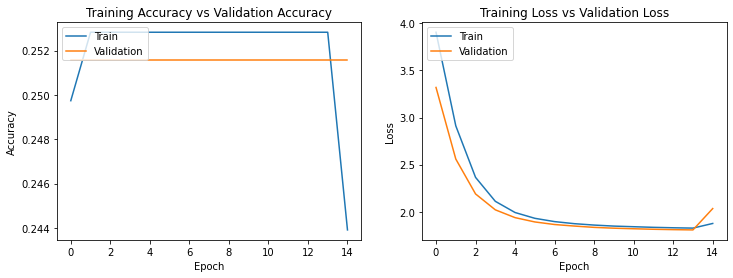

In [52]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [53]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18975), started 0:16:07 ago. (Use '!kill 18975' to kill it.)

In [54]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc   = model.evaluate(valid)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 0s 16ms/step - loss: 2.0338 - accuracy: 0.2516
final train accuracy = 25.28 , validation accuracy = 25.16


Augmentation

In [55]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

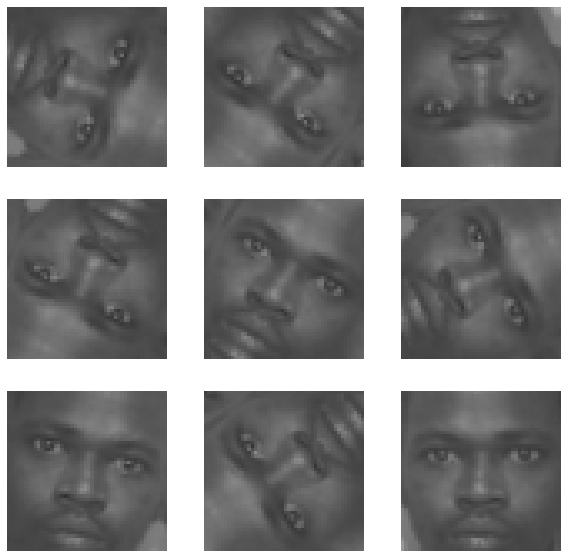

In [56]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [57]:
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(48, 48, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
   layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)         

In [60]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=3)
epochs=15
history = model.fit(
  train,
  validation_data=valid,
  epochs=epochs,
   callbacks=[tensorboard_callback] 
)

Epoch 1/15
359/359 [==============================] - 15s 40ms/step - loss: 1.8009 - accuracy: 0.2497 - val_loss: 1.4789 - val_accuracy: 0.4265
Epoch 2/15
359/359 [==============================] - 16s 44ms/step - loss: 1.4986 - accuracy: 0.4214 - val_loss: 1.3219 - val_accuracy: 0.4983
Epoch 3/15
359/359 [==============================] - 15s 41ms/step - loss: 1.3074 - accuracy: 0.5064 - val_loss: 1.2645 - val_accuracy: 0.5178
Epoch 4/15
359/359 [==============================] - 15s 42ms/step - loss: 1.2025 - accuracy: 0.5401 - val_loss: 1.2180 - val_accuracy: 0.5331
Epoch 5/15
359/359 [==============================] - 16s 46ms/step - loss: 1.1118 - accuracy: 0.5806 - val_loss: 1.1895 - val_accuracy: 0.5408
Epoch 6/15
359/359 [==============================] - 15s 41ms/step - loss: 1.0228 - accuracy: 0.6174 - val_loss: 1.2542 - val_accuracy: 0.5422
Epoch 7/15
359/359 [==============================] - 15s 41ms/step - loss: 0.9237 - accuracy: 0.6574 - val_loss: 1.2874 - val_accuracy:

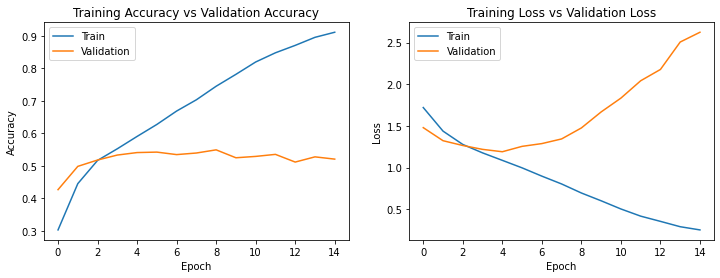

In [61]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [62]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18975), started 0:20:14 ago. (Use '!kill 18975' to kill it.)

In [63]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc   = model.evaluate(valid)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 0s 16ms/step - loss: 2.6249 - accuracy: 0.5206
final train accuracy = 83.99 , validation accuracy = 52.06
